In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
## Read the text files from the path argument
def read_textfiles(path):
    poss_columns = ['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Querbeschl', 'Giergeschw', 'Wankwinkel', 'Radius']
    files = sorted(os.listdir(path))
    print("No. of files to be processed are: ", len(files))
    count  = 0
    data = []
    dup_path = path
    for each_file in files:
        dup_path += each_file
#         print(dup_path)
        print(count, end=',')
#         data.append(pd.read_csv(dup_path, sep = '\t', engine = 'python', decimal = ',', skiprows = 40, usecols = poss_columns)[2: ].apply(pd.to_numeric))
        data.append(pd.read_csv(dup_path, sep = '\t', engine = 'python', decimal = ',', skiprows = 40)[2: ].apply(pd.to_numeric))
        count += 1
        dup_path = path
    print("No. of files processed are: ", count)
    return data

In [3]:
## all files are stored as a list of dataframes
file_data = read_textfiles('/home/loki/MAS/R_D/Moses/Full_data/sk_folded/0031678-8801103(001)/')

No. of files to be processed are:  6
0,1,2,3,4,5,No. of files processed are:  6


In [4]:
file_merged_data = np.asarray(pd.concat(file_data))
# row, col = file_merged_data.shape
# sequence = file_merged_data.reshape((row, 1, col))
print(list(file_data[0]))
print(len(list(file_data[0])))

['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Schwimmwin', 'F_Spur_VL', 'F_Spur_VR', 'L�ngsbesch', 'Querbeschl', 'Giergeschw', 'Nickwinkel', 'Wankwinkel', 'Gierwinkel', 'Nickgeschw', 'Wankgeschw', 'Hochbeschl', 'Fahrge_DIS', 'GPS_Status', 'Status_DIS', 'Status_TRK', 'GPS_FMS_St', 'Schwim_MSP', 'Schwim_MHA', 'Radius', 'Fdiff_Spur', 'Lichtschra', 'L�ngengrad', 'Breitengrd', 'H�he', 'Fahrg_NULL', 'LenkgeschM', 'StWhl_Angl', 'StWhl_AnglSpd', 'VehSpd_Disp', 'Odo', 'AirTemp_Outsd_Disp', 'AirTemp_Outsd', 'BrkPdl_Stat', 'Brk_Stat', 'BrkTrq_V2', 'FullBrk_Actv', 'BrkIntrvntn_Actv_ESP', 'ESP_CtrlLmp_Info', 'VehAccel_X_V2', 'VehAccel_X_Offset', 'VehAccel_Y_V2', 'VehAccel_Y_Offset', 'VehYawRate_Raw', 'VehYawRateOffset_V2', 'WhlRPM_FL', 'WhlRPM_FR', 'WhlRPM_RL', 'WhlRPM_RR', 'AccelPdlPosn_Raw', 'AccelPdlPosn', 'KickDnSw_Psd', 'EngRPM', 'TankLvl', 'TankLvl_Disp_V2', 'SupBat_Volt', 'SupBat_Curr', 'StW_Trq_EPS', 'EPS_FtWhlAngl', 'EPS_FtWhlAngl_Offset']
63


In [5]:
removable_columns = ['L�ngsbesch', 'GPS_Status', 'Status_DIS', 'Status_TRK', 'GPS_FMS_St','Breitengrd', 'L�ngengrad', 
                     'Breitengrd', 'H�he', 'Fahrg_NULL', 'StWhl_AnglSpd', 'Odo', 'AirTemp_Outsd_Disp', 'AirTemp_Outsd',
                     'BrkPdl_Stat', 'Brk_Stat', 'FullBrk_Actv', 'BrkIntrvntn_Actv_ESP', 'ESP_CtrlLmp_Info',
                     'AccelPdlPosn_Raw', 'AccelPdlPosn', 'KickDnSw_Psd',  'TankLvl', 'TankLvl_Disp_V2', 'SupBat_Volt', 
                     'SupBat_Curr', 'StW_Trq_EPS', 'EPS_FtWhlAngl', 'EPS_FtWhlAngl_Offset', 'VehAccel_X_Offset',
                      'VehYawRateOffset_V2', 'BrkTrq_V2']

In [6]:
## Remove the columns whose values don't change
for each_file in range(len(file_data)):
    file_data[each_file] = file_data[each_file].drop(columns=removable_columns)

In [7]:
file_merged_data = np.asarray(pd.concat(file_data))
# row, col = file_merged_data.shape
# sequence = file_merged_data.reshape((row, 1, col))
print(list(file_data[0]))
print(len(list(file_data[0])))

['Lenkradwin', 'Lenkmoment', 'Fahrgeschw', 'Schwimmwin', 'F_Spur_VL', 'F_Spur_VR', 'Querbeschl', 'Giergeschw', 'Nickwinkel', 'Wankwinkel', 'Gierwinkel', 'Nickgeschw', 'Wankgeschw', 'Hochbeschl', 'Fahrge_DIS', 'Schwim_MSP', 'Schwim_MHA', 'Radius', 'Fdiff_Spur', 'Lichtschra', 'LenkgeschM', 'StWhl_Angl', 'VehSpd_Disp', 'VehAccel_X_V2', 'VehAccel_Y_V2', 'VehAccel_Y_Offset', 'VehYawRate_Raw', 'WhlRPM_FL', 'WhlRPM_FR', 'WhlRPM_RL', 'WhlRPM_RR', 'EngRPM']
32


## PCA 

In [8]:
## Standardize the data
np_data = file_data[0].to_numpy()
np_data_std = (np_data-np.mean(np_data, axis = 0))/np.std(np_data, axis = 0)
print(np_data)
print(np_data_std)
# print(np.mean(np_data, axis = 0))
# print(np.std(np_data, axis = 0))

[[6.14131160e+01 1.38521700e+00 4.83830300e+00 ... 3.64941600e+01
  3.79939200e+01 7.73907120e+02]
 [6.15733320e+01 1.40200200e+00 4.89170600e+00 ... 3.64941600e+01
  3.79939200e+01 7.73907120e+02]
 [6.15046680e+01 1.43099400e+00 4.83067400e+00 ... 3.64941600e+01
  3.84938400e+01 7.73907120e+02]
 ...
 [9.09386360e+01 4.29663400e+00 6.48327590e+01 ... 5.16042420e+02
  5.29540260e+02 2.23698153e+03]
 [9.06868680e+01 4.28137500e+00 6.48327590e+01 ... 5.16042420e+02
  5.29540260e+02 2.23998117e+03]
 [9.06868680e+01 4.31341900e+00 6.48251300e+01 ... 5.13042900e+02
  5.30040180e+02 2.23898129e+03]]
[[-1.17777755 -1.14773963 -1.54981022 ... -1.55011842 -1.55376825
  -1.47619064]
 [-1.15593153 -1.130787   -1.54682857 ... -1.55011842 -1.55376825
  -1.47619064]
 [-1.16529411 -1.10150545 -1.55023617 ... -1.55011842 -1.55035658
  -1.47619064]
 ...
 [ 2.8481306   1.79275394  1.79985902 ...  1.84377248  1.80075494
   2.02830597]
 [ 2.81380115  1.77734255  1.79985902 ...  1.84377248  1.80075494
   2.

In [9]:
## Obatain eigenvalues and eigenvectors from covariance matrix
cov_matrx = (np_data_std-np.mean(np_data_std, axis =0)).T.dot(np_data_std-np.mean(np_data_std, axis =0)) / (np_data_std.shape[0]-1)
print(cov_matrx.shape)
print(cov_matrx)

(32, 32)
[[1.00007988 0.9669819  0.93846921 ... 0.9408424  0.93906904 0.91006088]
 [0.9669819  1.00007988 0.9498829  ... 0.95098945 0.9502719  0.89402466]
 [0.93846921 0.9498829  1.00007988 ... 0.99994814 0.99997629 0.93864958]
 ...
 [0.9408424  0.95098945 0.99994814 ... 1.00007988 1.00004455 0.93932414]
 [0.93906904 0.9502719  0.99997629 ... 1.00004455 1.00007988 0.93876111]
 [0.91006088 0.89402466 0.93864958 ... 0.93932414 0.93876111 1.00007988]]


In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrx)
print(eigen_vals.shape)
print(eigen_vecs.shape)
print()
print("Eigen Values")
print(eigen_vals)
print()
print("Eigen vectors")
print(eigen_vecs)

(32,)
(32, 32)

Eigen Values
[2.14410414e+01 1.62597322e+00 1.41770552e+00 1.02483525e+00
 9.97085857e-01 9.77721648e-01 8.33088671e-01 7.20650882e-01
 6.06606307e-01 4.40449527e-01 4.26853715e-01 2.30453663e-01
 1.51995902e-01 6.10185832e-02 1.77395173e-02 1.51678226e-02
 6.67576468e-03 4.86494014e-03 1.50714217e-03 5.67537956e-04
 1.57456961e-04 1.09794091e-04 8.11917979e-05 3.87494717e-05
 2.29396395e-05 1.92960184e-05 1.22988745e-05 1.54980824e-05
 1.59762446e-05 2.44266951e-08 1.22647659e-07 0.00000000e+00]

Eigen vectors
[[-2.10264676e-01 -1.61623894e-02  1.03310390e-01 ...  1.96595299e-05
   1.67766917e-04  0.00000000e+00]
 [-2.10744780e-01 -3.91944536e-02  2.12317637e-02 ...  2.16202993e-06
   2.39536305e-05  0.00000000e+00]
 [-2.13243481e-01  2.56781279e-02 -9.95859468e-02 ...  4.49256047e-06
   1.29575951e-03  0.00000000e+00]
 ...
 [-2.13436563e-01  2.62820307e-02 -9.66791426e-02 ...  6.94585202e-04
   2.93201047e-04  0.00000000e+00]
 [-2.13302642e-01  2.64263320e-02 -1.00454

In [11]:
## sort eigen values and corresponding eigen vectors in descending order
eigen_tuples = [(eigen_vals[idx], eigen_vecs[:, idx]) for idx in range(len(eigen_vals))]
eigen_tuples.sort(key = lambda x:x[0], reverse=True)
print("Eigen values: ")
for each_tuple in eigen_tuples:
    print(each_tuple[0], end=' , ')

Eigen values: 
21.441041413048453 , 1.6259732223371501 , 1.4177055243135863 , 1.02483524813717 , 0.9970858573536564 , 0.9777216479867555 , 0.8330886709884422 , 0.7206508821928237 , 0.6066063066230939 , 0.44044952720322733 , 0.4268537148413356 , 0.23045366265103553 , 0.15199590209217295 , 0.061018583201294635 , 0.0177395173246357 , 0.015167822625500984 , 0.0066757646796072965 , 0.004864940141339991 , 0.001507142168743547 , 0.0005675379556474336 , 0.0001574569605705247 , 0.00010979409146632734 , 8.119179788186129e-05 , 3.8749471715227586e-05 , 2.2939639468861467e-05 , 1.9296018432708755e-05 , 1.5976244644463403e-05 , 1.549808242990279e-05 , 1.2298874472398878e-05 , 1.226476590288179e-07 , 2.4426695127017173e-08 , 0.0 , 

In [12]:
## Explained variance for finding the select the required Principal Components
eigen_vals_sum = sum(eigen_vals)
print("Eigen values sum: \n", eigen_vals_sum)
exp_variance = [(eigen_val*100)/eigen_vals_sum for eigen_val in sorted(eigen_vals, reverse=True)]
cum_exp_variance = np.cumsum(exp_variance)
print()
print("Explained variance: \n", exp_variance)
print()
print("Cumulative variance: \n", cum_exp_variance)

Eigen values sum: 
 31.002476236121108

Explained variance: 
 [69.15912538646641, 5.24465597506925, 4.572878351767953, 3.305656104150579, 3.2161490900263887, 3.153688887752805, 2.6871681624508668, 2.324494587800669, 1.9566382440004404, 1.4206914436404208, 1.3768374874004634, 0.7433395348676473, 0.4902701994980708, 0.19681841778238876, 0.057219678807357066, 0.048924552058292985, 0.021533004746986426, 0.015692101831762166, 0.004861360612826048, 0.0018306213714186896, 0.0005078851101160461, 0.0003541461999038832, 0.0002618881061741269, 0.0001249883119661275, 7.399292654608796e-05, 6.224024908767413e-05, 5.1532156730917565e-05, 4.998982117385163e-05, 3.9670619787684606e-05, 3.956060093223154e-07, 7.878949713880445e-08, 0.0]

Cumulative variance: 
 [ 69.15912539  74.40378136  78.97665971  82.28231582  85.49846491
  88.6521538   91.33932196  93.66381655  95.62045479  97.04114623
  98.41798372  99.16132326  99.65159345  99.84841187  99.90563155
  99.9545561   99.97608911  99.99178121  99.9966

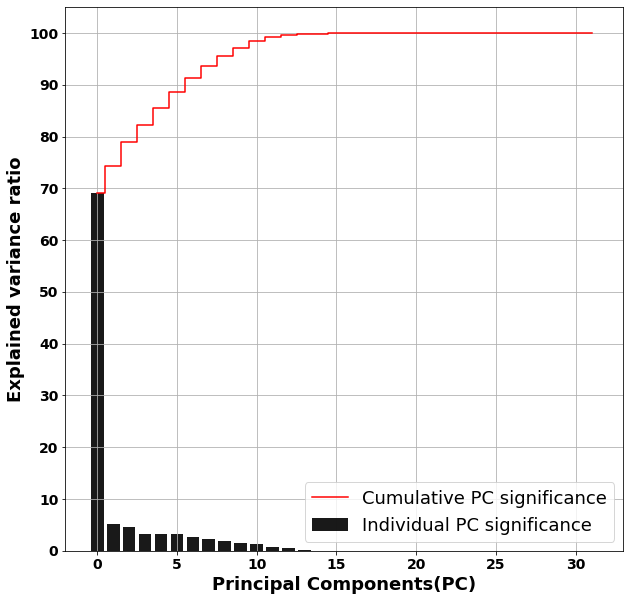

In [32]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(exp_variance)), exp_variance, alpha=0.9, align='center', label = 'Individual PC significance', color="k")
plt.step(range(len(cum_exp_variance)), cum_exp_variance, where = 'mid', label = 'Cumulative PC significance', c= 'r')
plt.xlabel("Principal Components(PC)", fontsize=18, weight="bold")
plt.ylabel("Explained variance ratio",fontsize=18, weight="bold")
plt.gca().legend(fontsize=18)
plt.grid("square")
plt.xticks(fontsize=14, rotation=0, weight="bold")
plt.yticks(np.arange(0, 110, step=10), fontsize=14, rotation=0, weight="bold")
plt.savefig("explained_variance.png", dpi=600)
plt.show()

In [33]:
print(eigen_tuples[3][1])

[ 0.00441837 -0.01094982  0.00593813 -0.00174622  0.03842178  0.0038967
  0.01170729  0.00547143 -0.02496777  0.00477746  0.024315    0.07140249
 -0.56669566  0.01161249  0.00631506 -0.00190917 -0.00182028 -0.00158281
 -0.00689338 -0.66248808 -0.47842374  0.00698383  0.0061836  -0.04775714
  0.00718164  0.          0.00491146  0.00624862  0.00617179  0.00638101
  0.00586516  0.00877423]


In [34]:
## Projection matrix W with eigen vectors with correspondece upto 95%
no_dim = 0
for val in cum_exp_variance:
    if val < 96:
        no_dim += 1
    else:
        break
W_matrix = np.zeros(shape = (len(eigen_vals),1))
for idx, each_tuple in enumerate(eigen_tuples):
    if idx < no_dim:
        W_matrix = np.hstack((W_matrix, each_tuple[1].reshape(len(eigen_vals),1)))
W_matrix = W_matrix[: ,1:]

In [35]:
np_data_std_projected = np_data_std.dot(W_matrix)
print(np_data_std_projected.shape)

(12520, 9)


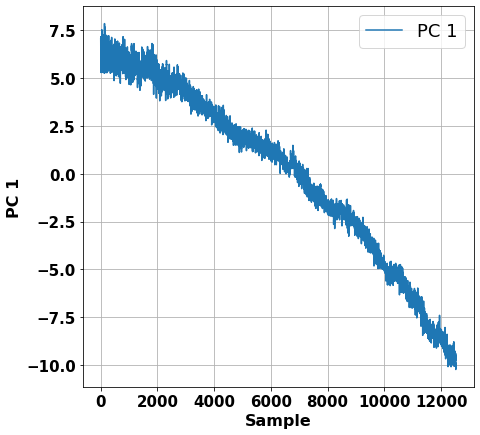

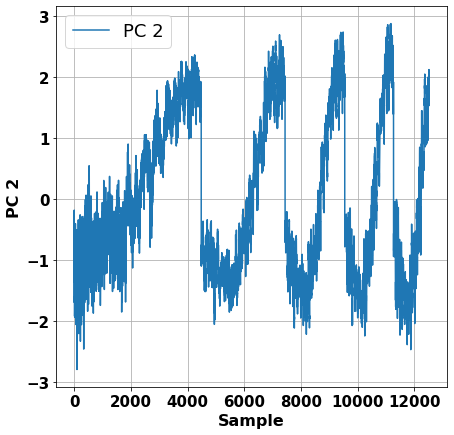

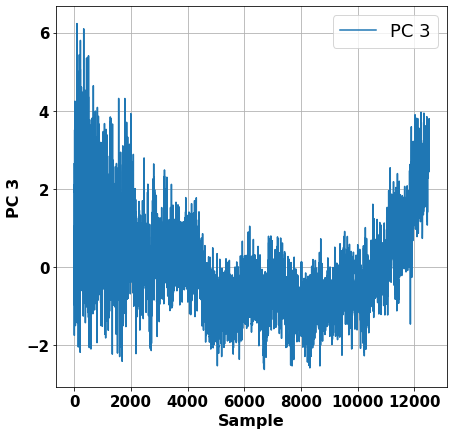

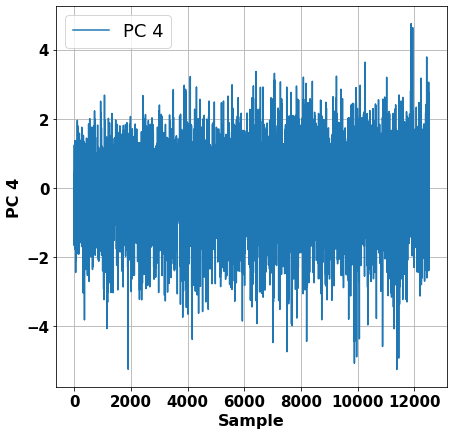

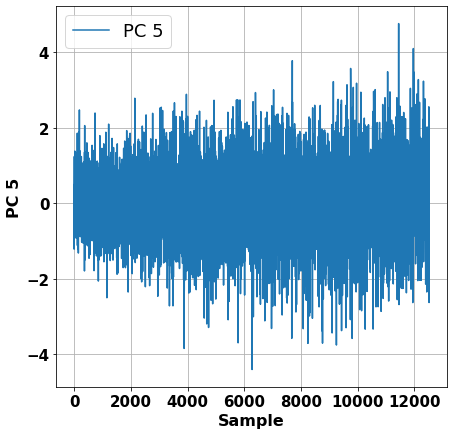

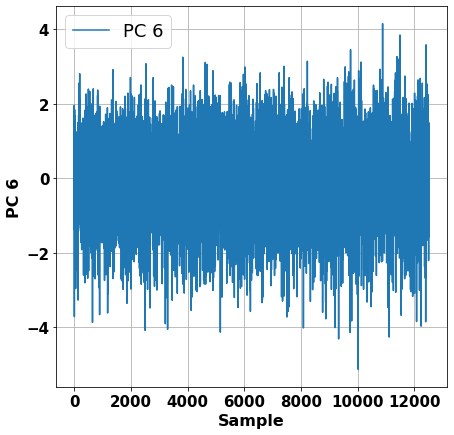

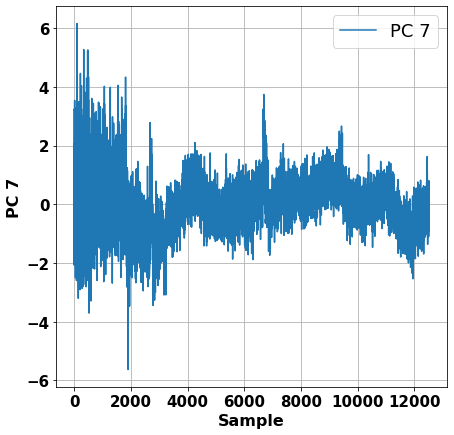

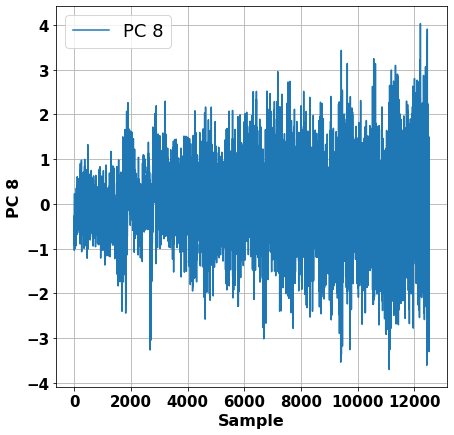

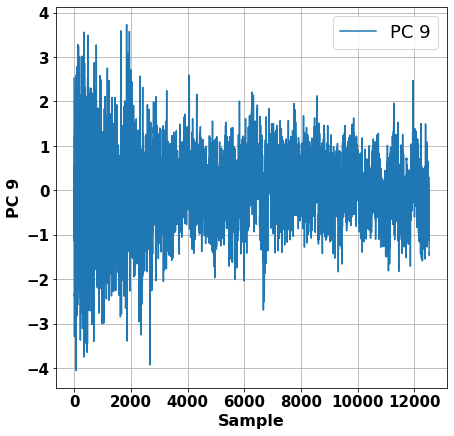

In [51]:
row, col = np_data_std_projected.shape
#fig = plt.figure(figsize=(30, 30))
for idx in range(0, col):
    fig = plt.figure(figsize=(7, 7))
    lbl = "PC "+str(idx+1)
    plt.plot(range(0, row), np_data_std_projected[:, idx], label=lbl)
    plt.xlabel("Sample", fontsize=16, weight="bold")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl, fontsize=16, weight="bold")
    plt.xticks(fontsize=15, rotation=0, weight="bold")
    plt.yticks(fontsize=15, rotation=0, weight="bold")
    plt.grid()
    plt.gca().legend(fontsize=18)
    title = str(idx+1)+"principalcomponents.png"
#fig.suptitle(title, fontsize=17, weight="bold")
    plt.savefig(title, dpi=600)
    plt.show()

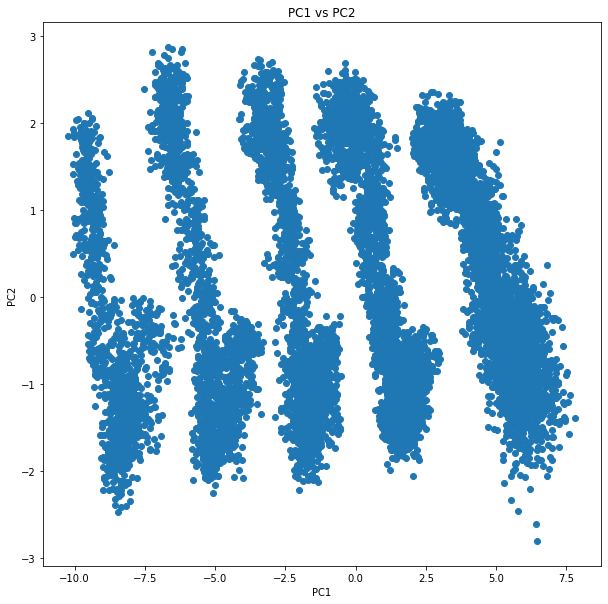

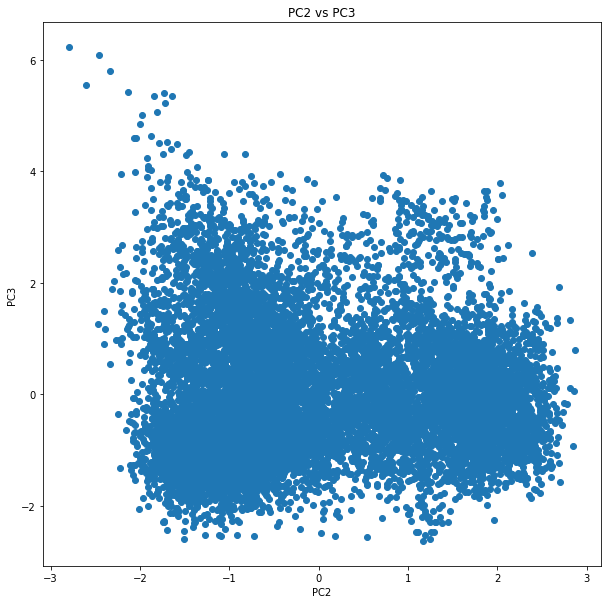

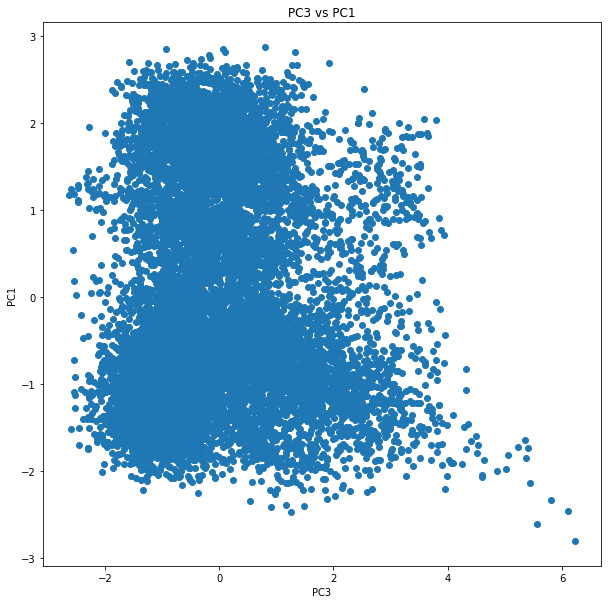

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(np_data_std_projected[:, 0], np_data_std_projected[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")
plt.show()
plt.figure(figsize=(10, 10))
plt.scatter(np_data_std_projected[:, 1], np_data_std_projected[:, 2])
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("PC2 vs PC3")
plt.show()
plt.figure(figsize=(10, 10))
plt.scatter(np_data_std_projected[:, 2], np_data_std_projected[:, 1])
plt.xlabel("PC3")
plt.ylabel("PC1")
plt.title("PC3 vs PC1")
plt.show()

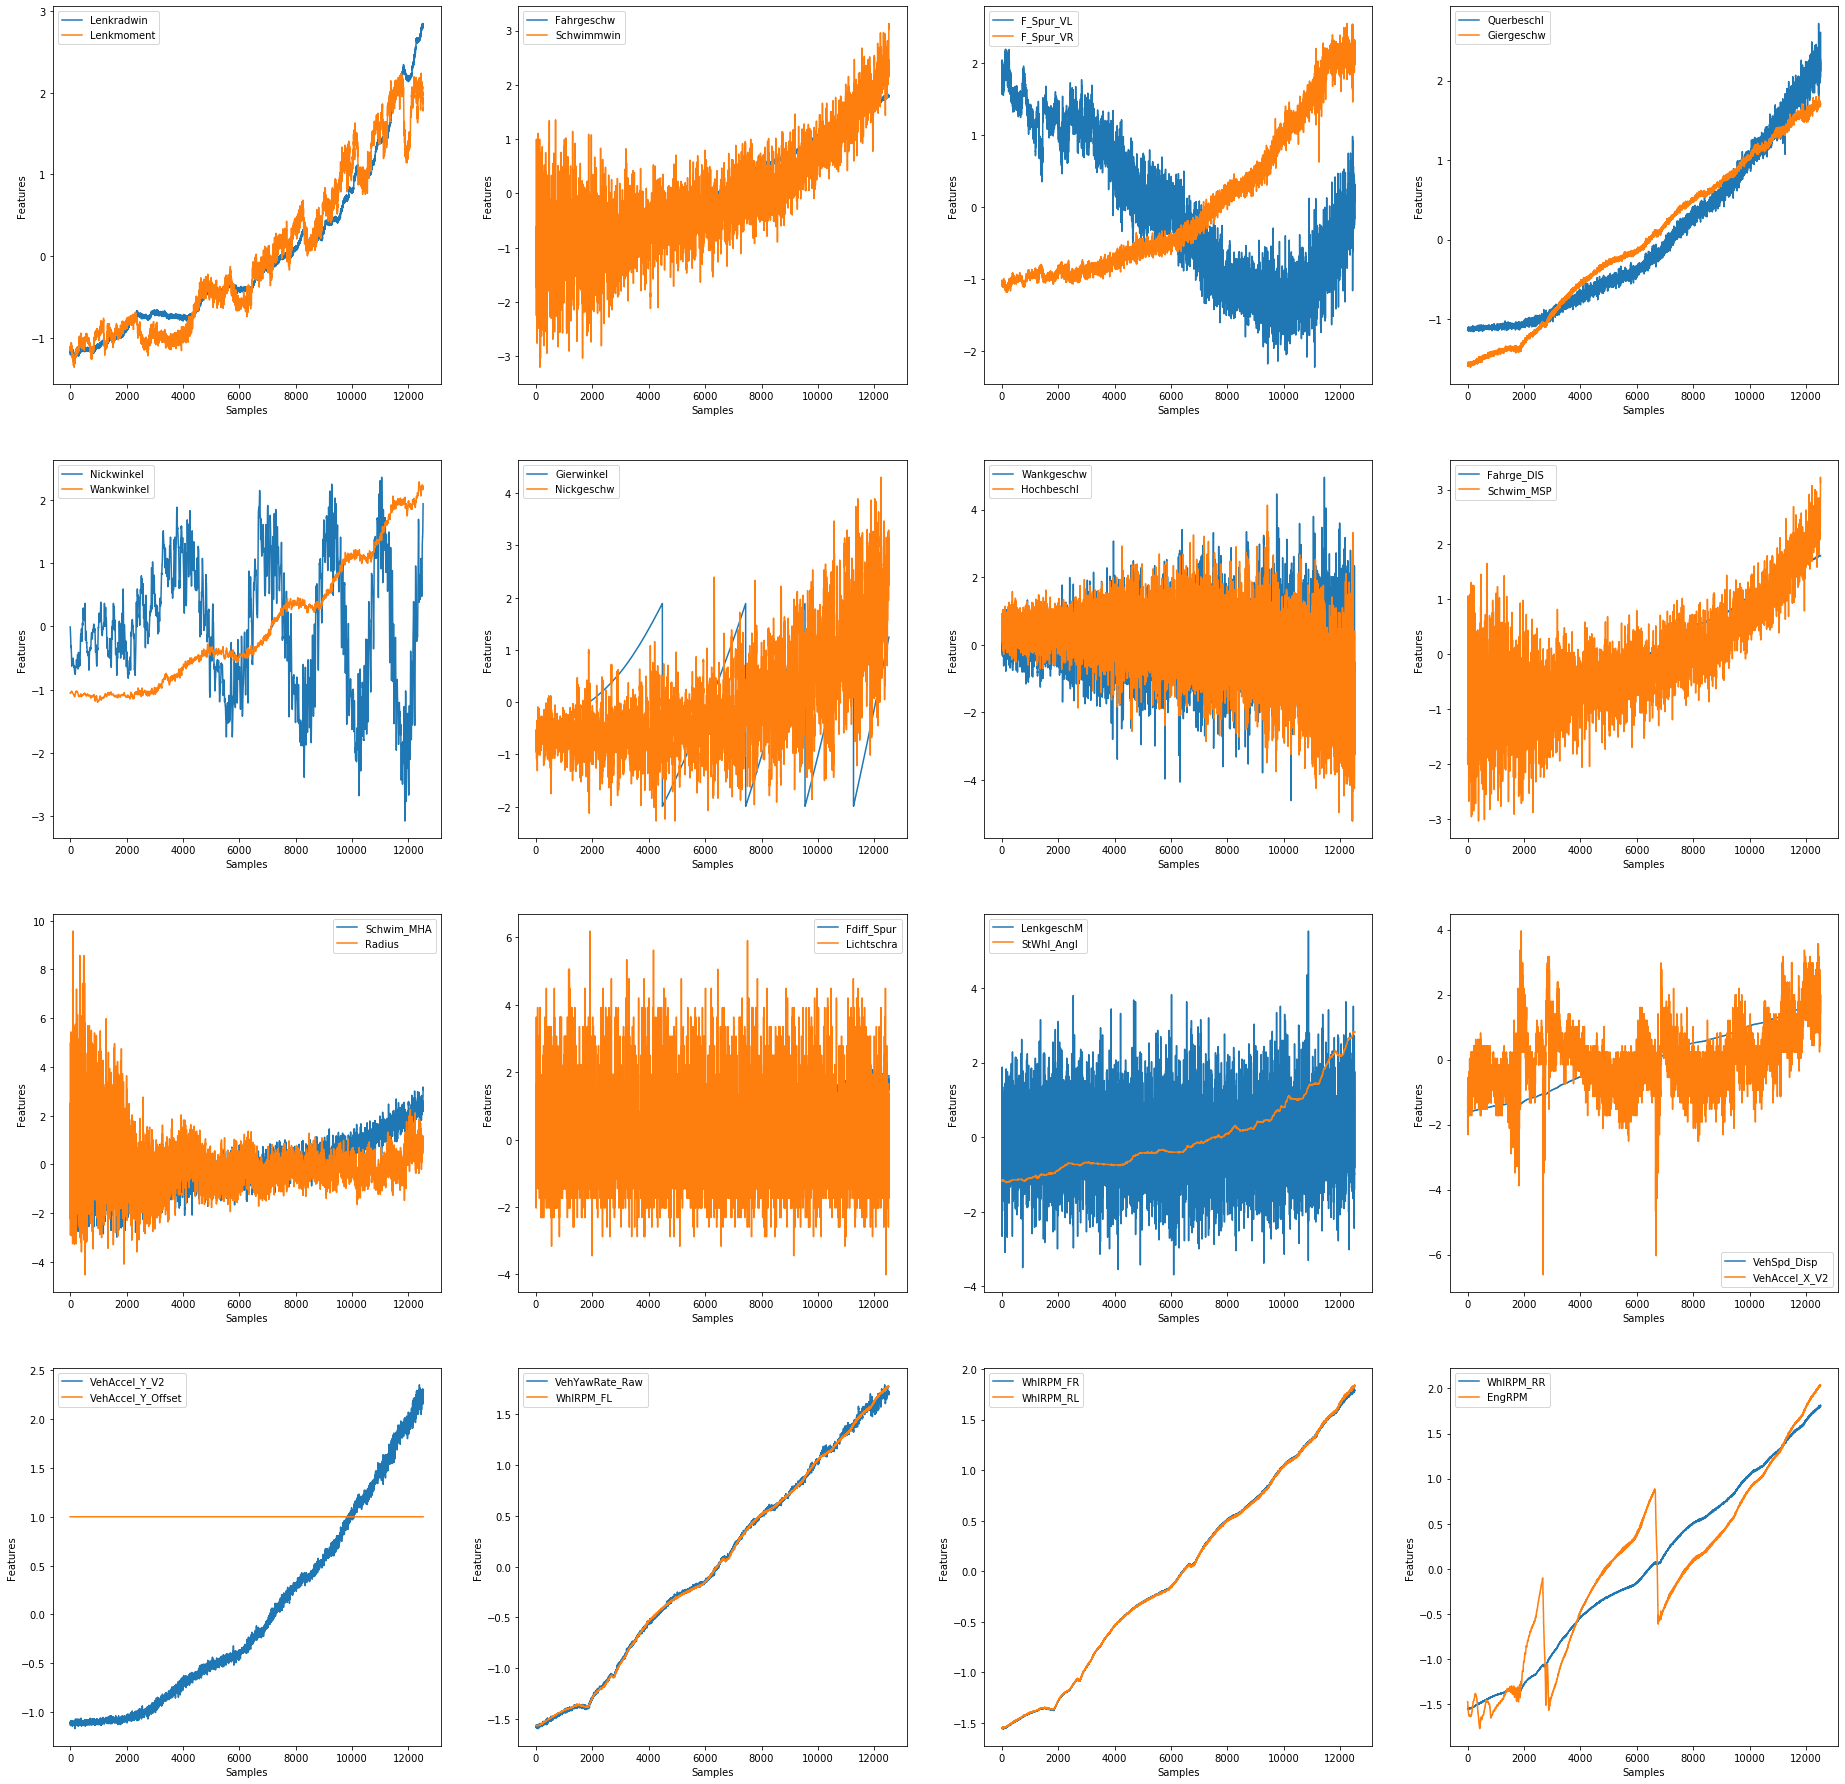

In [53]:
data_columns = list(file_data[0])
plt.figure(figsize=(32,32))
count = 1
for idx in range(0, len(data_columns)-1, 2):
    plt.subplot(4, 4, count)
    count += 1
    plt.plot(range(0, len(np_data_std[:, idx])), np_data_std[:, idx], label=data_columns[idx])
    plt.plot(range(0, len(np_data_std[:, idx+1])), np_data_std[:, idx+1], label=data_columns[idx+1])
    plt.xlabel("Samples")
    plt.ylabel("Features")
    plt.gca().legend()

In [54]:
mean_value = np.mean(np_data_std_projected, axis = 0).reshape((1,9))
standard_dev_value = np.std(np_data_std_projected, axis = 0).reshape((1,9))
print("Mean value: ")
print(mean_value)
print()
print("Standard deviation value: ")
print(standard_dev_value)
print()
threshold = 2*standard_dev_value
print("Thereshold Value: \n", threshold)

Mean value: 
[[-9.28855856e-15  5.37961582e-16 -8.44940021e-16 -1.05701745e-16
  -1.49368005e-16 -5.51032418e-17 -7.44363747e-16 -7.69529985e-17
  -1.83186799e-16]]

Standard deviation value: 
[[4.63026229 1.27508563 1.19062685 1.01230104 0.99850199 0.98875859
  0.91270046 0.84887768 0.77881824]]

Thereshold Value: 
 [[9.26052458 2.55017125 2.38125369 2.02460208 1.99700397 1.97751719
  1.82540092 1.69775537 1.55763649]]


## Application of Density based clustering algorithm to find cluster on a test run

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### How to choose hyperparameters for DBSCAN:
#### To choose the value of eps:
1. Apply KNN to get the distance matrix and the calculate the best value for the eps in DBSCAN
2. Take the last column of distance matrix and sort them to find the ankle in the graph and that point of transition on y-axis is taken as the eps for the DBSCAN
3. Since there is no metric to calculate the value of k in the KNN typically k value is choosen as sqrt(N) where N being the number of samples
#### To choose the value of min_samples:
1. Typically the value for the min_samples $\geq$ (D+1) where D is the number of dimensions.

[[    0   786   348 ...   615   524   196]
 [    1   160   335 ...   260  1478  1277]
 [    2   639  1480 ...   963  1294  1438]
 ...
 [12517 12516 12495 ... 12117 12218 12174]
 [12518 12514 12434 ... 12323 12334 12348]
 [12519 12513 12498 ... 12349 12260 12248]]
[[0.         1.28113057 1.28856761 ... 2.87551243 2.8831408  2.88988475]
 [0.         1.00711381 1.30789208 ... 2.67534371 2.67844117 2.69405524]
 [0.         1.27359347 1.45904757 ... 2.37921564 2.38171918 2.3927951 ]
 ...
 [0.         0.80588317 1.81578836 ... 3.54290795 3.54380298 3.54692431]
 [0.         1.27968756 2.06210371 ... 3.54438986 3.5692534  3.57939737]
 [0.         1.63690024 1.75363185 ... 3.06401466 3.06835872 3.06965656]]


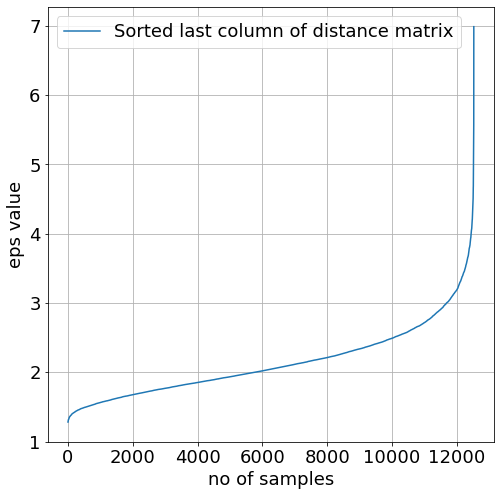

In [57]:
neighbors = NearestNeighbors(n_neighbors=int(np.sqrt(len(np_data_std_projected)))).fit(np_data_std_projected)
distances, indices = neighbors.kneighbors(np_data_std_projected)
print(indices)
print(distances)
plt.figure(figsize=(8, 8))
plt.plot(sorted(distances[:, -1]), label="Sorted last column of distance matrix")
plt.xlabel("no of samples", fontsize=18)
plt.ylabel("eps value", fontsize=18)
plt.grid()
plt.gca().legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("Knee_NN.png", dpi=600)
plt.show()

Fitting a testrun to DBSCAN with the above hyperparameters and getting the labels

In [58]:
clustering = DBSCAN(eps=3, min_samples=10).fit(np_data_std_projected)
labels = clustering.labels_

In [59]:
unique, counts = np.unique(labels, return_counts=True)
print("Unique values in labels: ")
print(unique)
print("Count of each unique values: (one to one correspondence)")
print(counts)
print("Parameters of DBSCAN: ")
print(clustering.get_params())

Unique values in labels: 
[-1  0]
Count of each unique values: (one to one correspondence)
[    3 12517]
Parameters of DBSCAN: 
{'algorithm': 'auto', 'eps': 3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


## Adding random values for anomaly detection:

(12520, 32)


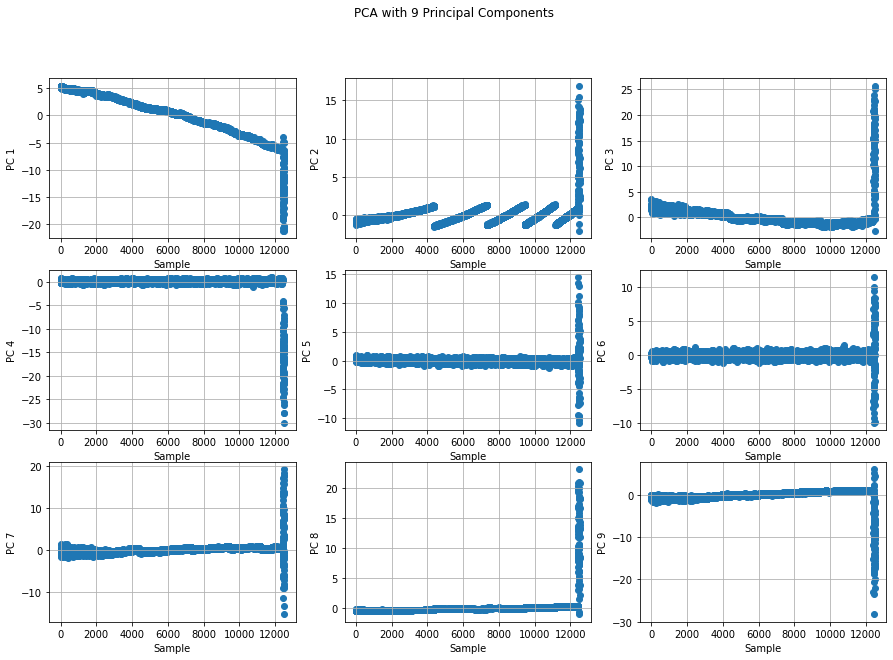

In [25]:
# new_meas = np.zeros((1, 32))
## Adding the 100 random samples to a testrun by replacing the last hundred samples.
new_meas = np.random.randint(0, 100, (100, 32))
correct_meas = np_data[100:,:]
new_meas = np.concatenate(( correct_meas, new_meas))
print(new_meas.shape)
## Standardize the new data with random samples
new_meas = (new_meas-np.mean(new_meas, axis = 0))/np.std(new_meas, axis = 0)
## Project with PCA
new_meas_projected = new_meas.dot(W_matrix)
## Printing the 9 principal components
row, col = new_meas_projected.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(3, 3, idx+1)
    plt.scatter(range(0, row), new_meas_projected[:, idx])
    plt.xlabel("Sample")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "PCA with "+str(no_dim)+" Principal Components"
fig.suptitle(title)
plt.show()

In [26]:
# Applying the DBSCAN with same hyper parameters for the newly projected testrun
clustering_new = DBSCAN(eps = 3, min_samples=10).fit(new_meas_projected)
new_labels = clustering_new.labels_

In [27]:
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
print(clustering_new.get_params())

[-1  0]
[  100 12420]
{'algorithm': 'auto', 'eps': 3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


In [28]:
print("Indexes where the noise is: ")
for index, value in enumerate(new_labels):
    if value == -1:
        print(index, end=',')

Indexes where the noise is: 
12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,

In [29]:
print("Percentage of valid measurement: ")
zero_index = np.where(new_unique == 0)[0][0]
## Calculating the percentage of valid measurement using the (no_zeros/total_samples)*100
print(np.round(new_counts[zero_index]/len(new_meas),3)*100)
group_labels = []
group_labels.append(list(new_labels))

Percentage of valid measurement: 
99.2


## Combination of testruns evaluation
Applied the same procedure to the other two testruns

In [30]:
np_new_data = file_data[1].to_numpy()
np_new_data_std = (np_new_data-np.mean(np_new_data, axis = 0))/np.std(np_new_data, axis = 0)

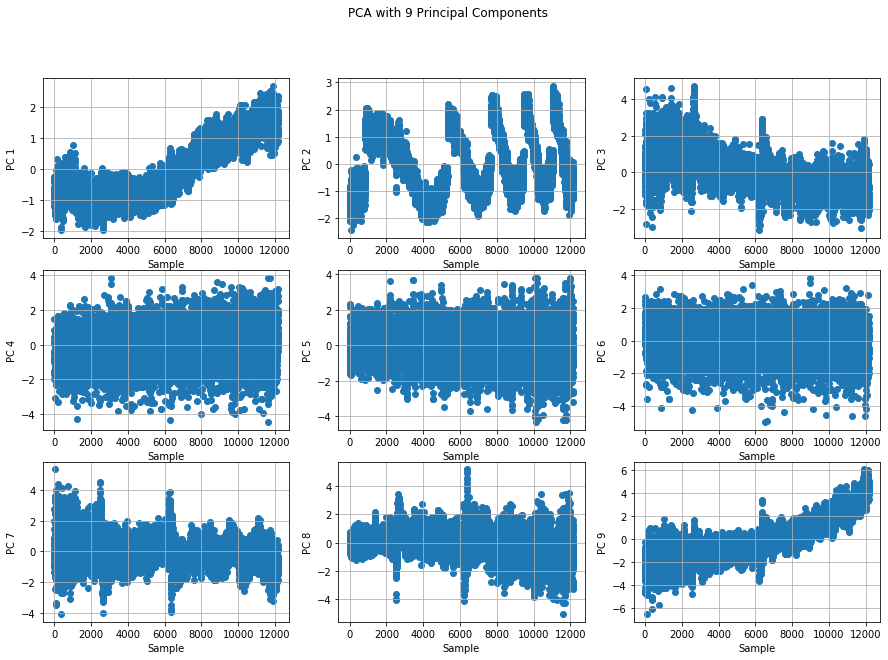

In [31]:
np_new_data_std_projected = np_new_data_std.dot(W_matrix)
row, col = np_new_data_std_projected.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(3, 3, idx+1)
    plt.scatter(range(0, row), np_new_data_std_projected[:, idx])
    plt.xlabel("Sample")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "PCA with "+str(no_dim)+" Principal Components"
fig.suptitle(title)
plt.show()

In [32]:
clustering_new = DBSCAN(eps = 3, min_samples=10).fit(np_new_data_std_projected)
new_labels = clustering_new.labels_

In [33]:
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
print(clustering_new.get_params())
group_labels.append(list(new_labels))

[-1  0]
[    2 12162]
{'algorithm': 'auto', 'eps': 3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


In [34]:
print(len(group_labels))

2


# Evaluation part-2
## Test run without changed values

In [35]:
np_new_data = file_data[2].to_numpy()
np_new_data_std = (np_new_data-np.mean(np_new_data, axis = 0))/np.std(np_new_data, axis = 0)

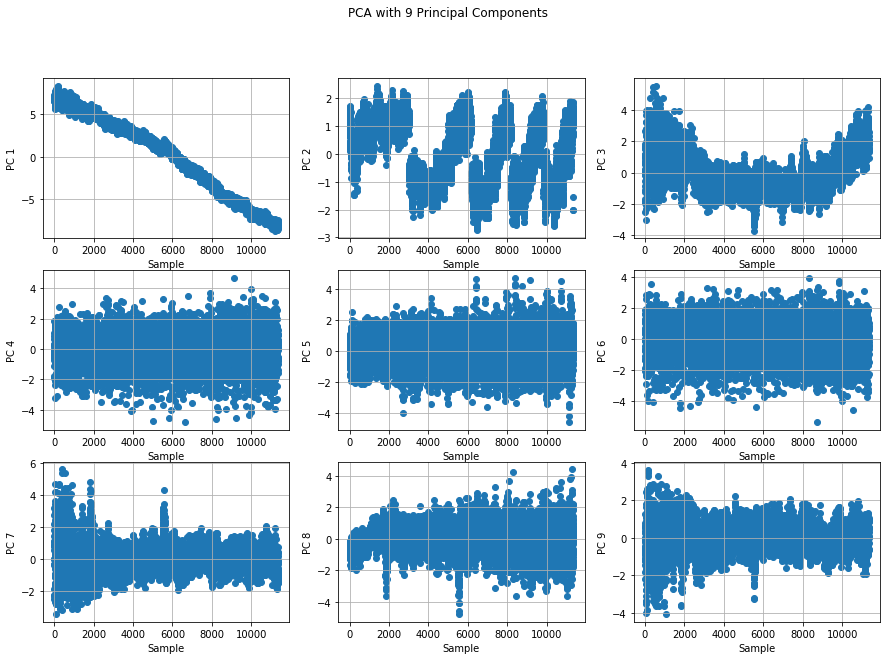

In [36]:
np_new_data_std_projected = np_new_data_std.dot(W_matrix)
row, col = np_new_data_std_projected.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(3, 3, idx+1)
    plt.scatter(range(0, row), np_new_data_std_projected[:, idx])
    plt.xlabel("Sample")
    ylbl = "PC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "PCA with "+str(no_dim)+" Principal Components"
fig.suptitle(title)
plt.show()

In [37]:
clustering_new = DBSCAN(eps = 3, min_samples=10).fit(np_new_data_std_projected)
new_labels = clustering_new.labels_

In [38]:
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
print(clustering_new.get_params())
group_labels.append(list(new_labels))

[-1  0]
[    3 11349]
{'algorithm': 'auto', 'eps': 3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


In [39]:
print(len(group_labels))

3


## Testing with changed values

In [40]:
import copy

In [41]:
radius_val = file_data[2]['Radius']
# print(radius_val)
for index, val in enumerate(list(file_data[2].columns)):
    print(index, val)

0 Lenkradwin
1 Lenkmoment
2 Fahrgeschw
3 Schwimmwin
4 F_Spur_VL
5 F_Spur_VR
6 Querbeschl
7 Giergeschw
8 Nickwinkel
9 Wankwinkel
10 Gierwinkel
11 Nickgeschw
12 Wankgeschw
13 Hochbeschl
14 Fahrge_DIS
15 Schwim_MSP
16 Schwim_MHA
17 Radius
18 Fdiff_Spur
19 Lichtschra
20 LenkgeschM
21 StWhl_Angl
22 VehSpd_Disp
23 VehAccel_X_V2
24 VehAccel_Y_V2
25 VehAccel_Y_Offset
26 VehYawRate_Raw
27 WhlRPM_FL
28 WhlRPM_FR
29 WhlRPM_RL
30 WhlRPM_RR
31 EngRPM


In [42]:
file_data = read_textfiles('/home/loki/MAS/R_D/Moses/Full_data/sk_folded/0031678-8801103(001)/')
for each_file in range(len(file_data)):
    file_data[each_file] = file_data[each_file].drop(columns=removable_columns)
changed_data = copy.deepcopy(file_data[2].to_numpy())
# print(np.std(changed_data, axis = 0))
changed_data[0, :] += (0.65*np.std(changed_data, axis = 0))
changed_data_std = (changed_data-np.mean(changed_data, axis = 0))/np.std(changed_data, axis = 0)
changed_data_std_projected = changed_data_std.dot(W_matrix)
print(changed_data_std_projected.shape)

No. of files to be processed are:  6
0,1,2,3,4,5,No. of files processed are:  6
(11352, 9)


In [43]:
clustering_new = DBSCAN(eps = 3, min_samples=9).fit(changed_data_std_projected)
new_labels = clustering_new.labels_
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
# print(clustering_new.get_params())
group_labels.append(list(new_labels))
print("Indexes where the noise is: ")
for index, value in enumerate(new_labels):
    if value == -1:
        print(index, end=',')

[-1  0]
[    4 11348]
Indexes where the noise is: 
0,1830,8266,9133,

## Application of Gaussian Mixture Model in case of clustering:
Link to the paper: https://openreview.net/pdf?id=BJJLHbb0-

In [44]:
from sklearn.decomposition import FastICA

(11352, 32)


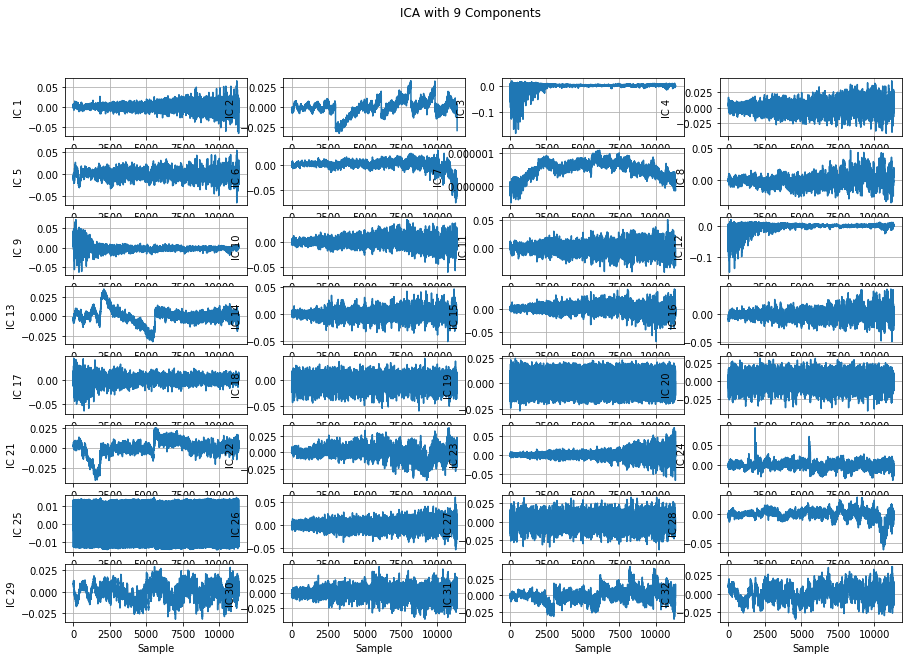

In [45]:
ica = FastICA(n_components=None, whiten=True)
data_transformed = ica.fit_transform(file_data[2].to_numpy())
print(data_transformed.shape)
row, col = data_transformed.shape
fig = plt.figure(figsize=(15, 10))
for idx in range(0, col):
    plt.subplot(8, 4, idx+1)
    plt.plot(range(0, row), data_transformed[:, idx])
    plt.xlabel("Sample")
    ylbl = "IC "+str(idx+1)
    plt.ylabel(ylbl)
    plt.grid()
title = "ICA with "+str(no_dim)+" Components"
fig.suptitle(title)
plt.show()

In [46]:
data_transformed[0][0] = 62
clustering_new = DBSCAN(eps = 3, min_samples=9).fit(data_transformed)
new_labels = clustering_new.labels_
new_unique, new_counts = np.unique(new_labels, return_counts=True)
print(new_unique)
print(new_counts)
# print(clustering_new.get_params())
group_labels.append(list(new_labels))
print("Indexes where the noise is: ")
for index, value in enumerate(new_labels):
    if value == -1:
        print(index, end=',')

[-1  0]
[    1 11351]
Indexes where the noise is: 
0,

## Correlogram plot

In [47]:
# g = sns.pairplot(file_data[0], kind="reg", markers = '+', height = 11.7, aspect = 0.701)
# g.savefig("correlation.png")